In [1]:
from pycaret.classification import *

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [3]:
df = pd.read_csv('df2prep4regression.csv', index_col=0)
df

,Units,Revenue_T,Manufacturer,Segment,IsCompete,MonthNo,Region,District
0,moreone,31676.40,Natura,Convenience,No,12,East,District #02
1,moreone,11020.59,Pirum,Productivity,No,12,West,District #38
2,moreone,11020.59,Pirum,Productivity,No,12,West,District #38
3,moreone,35010.36,VanArsdel,Moderation,Yes,12,East,District #10
4,moreone,16441.11,Currus,Select,No,12,West,District #38
...,...,...,...,...,...,...,...,...
1048570,one,5291.37,Natura,Convenience,No,4,East,District #03
1048571,one,5291.37,Natura,Convenience,No,4,Central,District #24
1048572,one,6614.37,Victoria,Extreme,No,4,West,District #34
1048573,one,4976.37,Pirum,Regular,Yes,4,West,District #36


In [4]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (996146, 8)
Unseen Data For Predictions: (52429, 8)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996146 entries, 0 to 996145
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Units         996029 non-null  object 
 1   Revenue_T     996146 non-null  float64
 2   Manufacturer  996146 non-null  object 
 3   Segment       996146 non-null  object 
 4   IsCompete     996146 non-null  object 
 5   MonthNo       996146 non-null  int64  
 6   Region        996146 non-null  object 
 7   District      996146 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 60.8+ MB


In [6]:
from pycaret.regression import *

exp_startrek =setup(data, target = 'Revenue_T',
#            ignore_features = ['case_id','patientid'],
 #           silent=True,
            categorical_features=['Units', 'Manufacturer', 'Segment', 'IsCompete', 'Region', 'District'],
#            numeric_features=['int64'],
            session_id=543)

lr = create_model('lr')

,Description,Value
0,Session id,543
1,Target,Revenue_T
2,Target type,Regression
3,Original data shape,"(996146, 8)"
4,Transformed data shape,"(996146, 30)"
5,Transformed train set shape,"(697302, 30)"
6,Transformed test set shape,"(298844, 30)"
7,Ordinal features,2
8,Numeric features,1
9,Categorical features,6


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1533.0706,6699981.5612,2588.4323,0.6790,0.4535,0.4052
1,1523.9234,7984982.2784,2825.7711,0.6402,0.4543,0.4064
2,1535.5919,8842293.7569,2973.5995,0.6157,0.4527,0.4026
3,1507.1877,5928665.8221,2434.8852,0.7021,0.4511,0.4026
4,1520.0049,6741681.1644,2596.4748,0.6752,0.4585,0.4070
5,1541.3055,8279437.9779,2877.4013,0.6346,0.4555,0.4082
6,1528.4154,7765044.0750,2786.5829,0.6430,0.4549,0.4052
7,1525.8885,7258238.8960,2694.1119,0.6594,0.4546,0.4051
8,1532.0743,7956329.3779,2820.6966,0.6419,0.4558,0.4057


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
# compare models
#top5 = compare_models(n_select = 5)

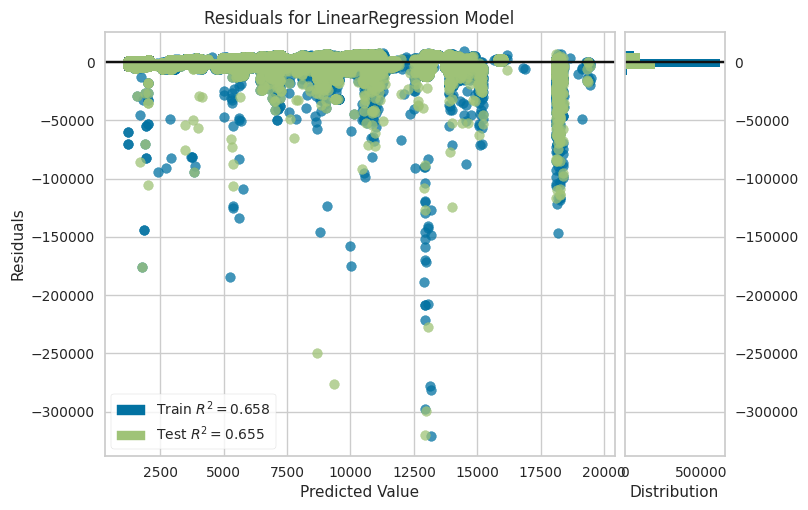

In [9]:
#plot_model(lr, plot = 'residual')
plot_model(lr)

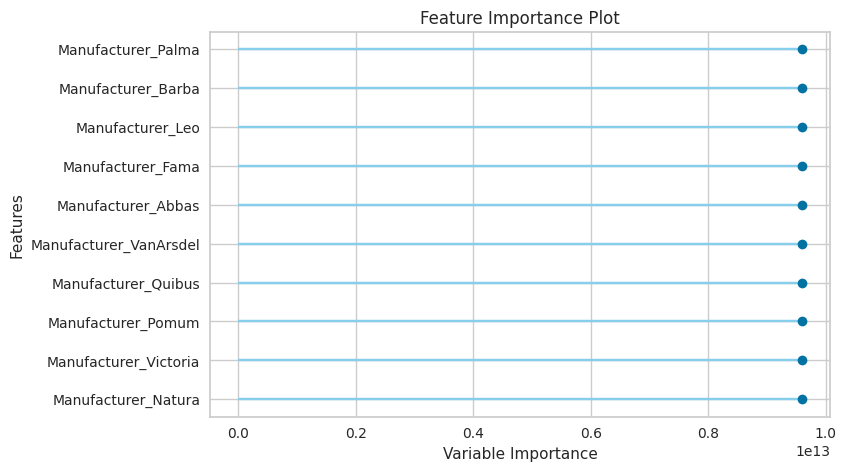

In [10]:
plot_model(lr, plot='feature')

In [14]:
dashboard(lr)

ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`